# Introducción a Python: IIQ2113

Para abrir en Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/SysBioengLab/IIQ2113-Chemical-reactor-design/blob/main/Ayudantias/Ayudantia1_IntroduccionPython_solucion.ipynb)

Python es una herramienta multipropósito que está posicionada a la cabeza de diferentes innovaciones científico-tecnológicas al ser un lenguaje de programación altamente versátil.

En este curso lo utilizaremos gracias al ecosistema de programación científica que este posee, permitiendo analizar sistemas dinámicos con facilidad.

# Motivación a Sistemas dinámicos

El análisis de sistemas dinámicos permite estudiar la evolución de diferentes componentes de un sistema. A la base de estos sistemas se encuentran las ecuaciones diferenciales ordinarias (EDO).

Para poder estudiar estos sistemas python ofrece diferentes paquetes para estudiarlos. Especialmente, utilizaremos `numpy` y `scipy` para análisis matemático, y `matplotlib` para graficar.

In [1]:
from scipy.integrate import solve_ivp # permite simular problemas de valor inicial
import numpy as np # como se importa numpy
import matplotlib.pyplot as plt # como se importa matplotlib


Para ejemplificar los sistemas dinámicos, un modelo clásico es el modelo de presa-depredador de Lotka y Volterra. Este tiene la siguiente forma:
$$
\frac{dx}{dt} = \alpha x - \beta x y\\
\frac{dy}{dt} = -\gamma  y + \delta x  y
$$
Donde $x$ e $y$ son la población de presas y depredadores respectivamente.

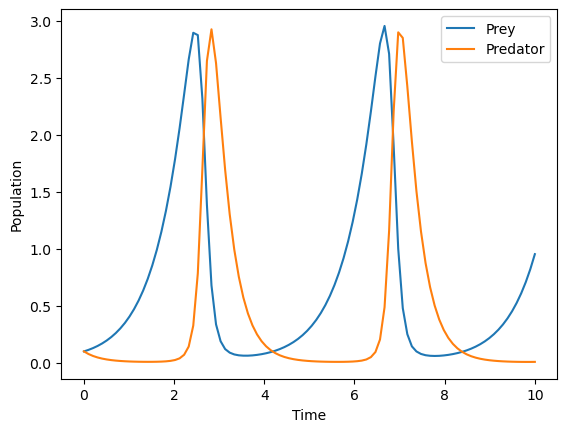

In [2]:
# definimos el sistema de ecuaciones diferenciales
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    dx_dt = a*x - b*x*y
    dy_dt = -c*y + d*x*y
    return dx_dt, dy_dt

# realizamos la simulación
sol = solve_ivp(lotkavolterra, t_span = [0,10], y0 = np.array([.1,.1]),
                args=(1.5, 3, 3, 4),
                dense_output = True)

# graficamos
t = np.linspace(0, 10 , 100)
z = sol.sol(t)
fig, ax = plt.subplots(dpi = 100)
ax.plot(t, z.T[:,0], label = 'Prey')
ax.plot(t, z.T[:,1], label = 'Predator')
ax.set_ylabel('Population')
ax.set_xlabel('Time')
ax.legend()

Como podemos ver, este sistema describe comportamientos cíclicos, que difícilmente son generados por medio de modelos normales. Además, nos ahorramos la necesidad de encontrar una solución analítica al problema. En la práctica, muchos sistemas dinámicos no poseen una solución analítica, por lo cual las simulaciones que estamos realizando aquí son de vital importancia en la ciencia.

# Conceptos claves

Para comprender los análisis que se pueden realizar, es necesario introducir diferentes conceptos clave que permitirán replicar las matemáticas de lápiz y papel por medio de python.

## Vectores y Matrices




Los vectores y las matrices, y la álgebra lineal en su totalidad, se encuentran a la base de varios avances en la ciencia gracias a la posibilidad de realizar cómputos de forma rápida. Además, permite estudiar fenómenos que se componen de más de un componente.

Para entender la formulación de vectores y matrices en python, veamos un ejemplo:

Si se tienen los vectores
$$
\mathbf{v} = \begin{bmatrix}
1\\
2\\
3
\end{bmatrix}\; \mathbf{w} = \begin{bmatrix}
5\\
4
\end{bmatrix}
$$

Las matrices:
$$
\mathbf{A} = \begin{bmatrix}
1&2&3\\
4&5&6
\end{bmatrix}\;
\mathbf{B} = \begin{bmatrix}
6&7\\
8&9\\
2&5
\end{bmatrix}\;
\mathbf{C} = \begin{bmatrix}
1&2\\
2&4\\
\end{bmatrix}\;
\mathbf{D} = \begin{bmatrix}
1&2&3\\
4&5&6\\
7&8&9
\end{bmatrix}
$$

Para ponerla en Python se debe utilizar el siguiente formato

In [3]:
import numpy as np # se importa el paquete de numpy desde los comandos
# vectores
v = np.array([1,2,3])
w = np.array([5,4])

# matrices (notar que es una lista de listas)
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,7],
              [8,9],
              [2,5]])
C = np.array([[1,2],
              [2,4]])
D = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

Una vez definidos los vectores y matrices, las operaciones entre vectores y matrices se vuelven sencillas.

In [4]:
# suma de vectores
v2 = v+v # si v es un numero se le suma a cada entrada
print('suma de vectores')
print(v2)
# producto de vectores
print('producto de vectores')
ww = w * w # notar que es la multiplicacion de entradas del vector
print(ww)
# producto punto de vectores
print('producto punto')
vdotv = np.dot(v,v)
print(vdotv)
# producto cruz de vectores
print('producto cruz')
vxv = np.cross(v+3,v)
print(vxv)

suma de vectores
[2 4 6]
producto de vectores
[25 16]
producto punto
14
producto cruz
[ 3 -6  3]


In [5]:
# producto matricial
print('producto matricial')
print(A @ B)
# transpuesta
print('transpuesta')
print(A.T)
# producto matriz vector
print('producto matriz vector')
print(A@v)

producto matricial
[[ 28  40]
 [ 76 103]]
transpuesta
[[1 4]
 [2 5]
 [3 6]]
producto matriz vector
[14 32]


Al igual que en álgebra lineal, existen operaciones que no están permitidas, especialmente la multiplicación o suma de vectores/matrices con dimensiones que no concuerdan.

Nota: Las celdas van a tirar error, no se preocupen.

In [6]:
B @ D

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
B+D

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

## Ecuaciones Diferenciales

Otro concepto clave, en especial para este curso, son las ecuaciones diferenciales ordinarias (EDO). Estas describen cómo cambia una variable determinada en el tiempo.

La ventaja de utilizar herramientas computacionales para el análisis de EDOs, es la posibilidad de simular dinámicas que no poseen, o es muy difícil encontrar, una solución analítica.

Tomando de ejemplo la ecuación diferencial
$$
\frac{dx}{dt} = \frac{\cos(\alpha x)}{\sqrt{1 + \beta \tanh(x)}}\; ;x_0 = 0.3
$$

Que posee una forma compleja, y una solución analítica puede ser difícil de encontrar.

Primero hay que definir la expresión del diferencial que estamos trabajando en python, para esto se debe definir una función que tenga la siguiente forma:


```
def fun(t, x, args)
  return dx_dt
```
Donde `t`, y `x` son el tiempo y la variable(s) a estudiar, y `args` los parámetros de la función/EDO.

In [7]:
def dx_dt(t, x, alpha, beta):
  return (np.cos(x * alpha) )/ (np.sqrt(1 + beta * np.tan(x)))

Y ahora utilizamos la función `solve_ivp` de scipy  ([documentación](https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)).

In [8]:
t_span = [0, 5] # rango en el cual se resuelve la EDO
x0 = [0.3] # condicion inicial
# parametros del modelo
alpha = 3
beta = 3
# tiempo en el cual se evalua
t_eval = np.linspace(# linspace genera n valores desde
    t_span[0], # aqui
    t_span[1], # hasta aquí
    100) # donde n se define aquí
# resolvemos la EDO
sol = solve_ivp(fun = dx_dt,
                t_span = t_span,
                y0 = x0,
                t_eval = t_eval,
                args = (alpha, beta)) # en args se ponen los parametros del modelo

sol # vemos lo que sale de la función

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 3.000e-01  3.215e-01 ...  5.235e-01  5.235e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

In [9]:
print('sol.t\n',sol.t) # tiempo
print('sol.y\n',sol.y) # evolucion de las variables

sol.t
 [0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444

En este caso, `sol.y` es una matriz, donde cada componente es la evolución de una variable (lo veremos mejor más adelante).

Para evaluar cuantas dimensiones tiene esta matriz usamos:

In [10]:
sol.y.shape

(1, 100)

Entonces, la solución corresponde a como una variable evoluciona en un intervalo de tiempo de 100 pasos entre 0 y 10.

Text(0, 0.5, 'X')

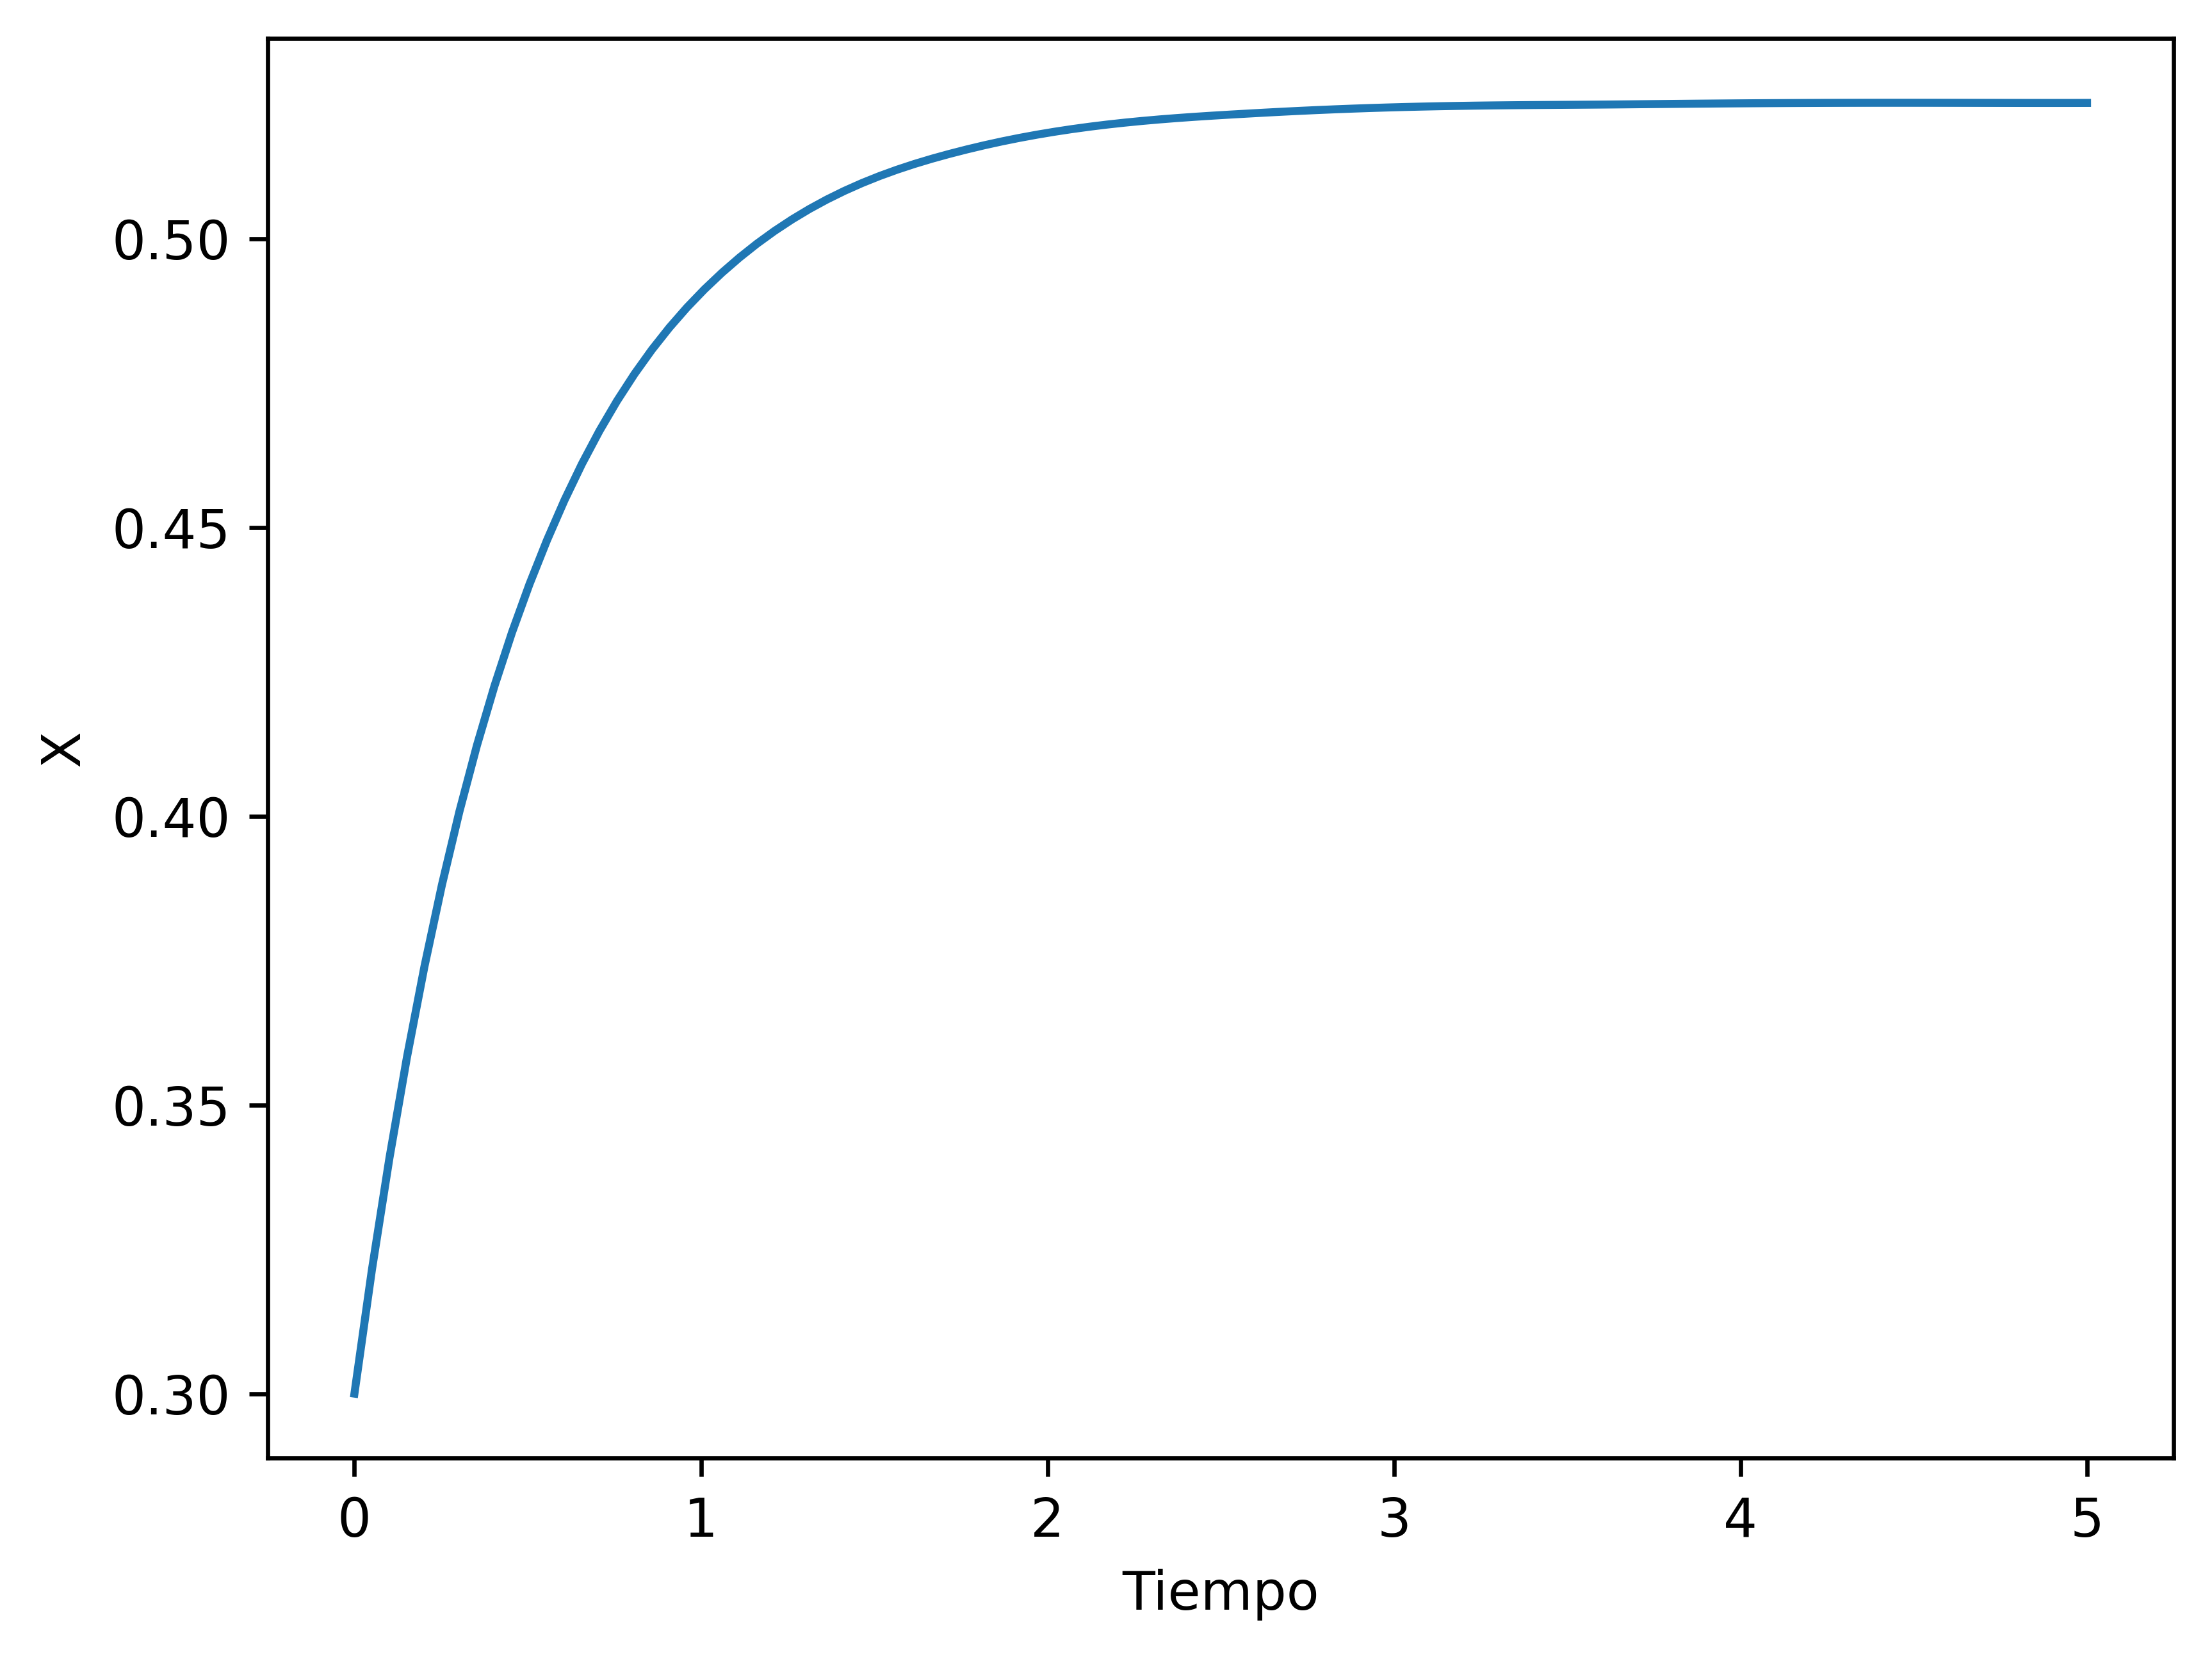

In [11]:
import matplotlib.pyplot as plt
tiempo = sol.t
x =sol.y[0,:] # obtenemos la variable 0
plt.figure(dpi = 600)
plt.plot(tiempo, x)
plt.xlabel('Tiempo')
plt.ylabel('X')

# Ejercicio 1

Para reacciones homogéneas existen diferentes tipos de cinéticas dadas por:
$$
\frac{dC_A}{dt} = -k C_A^n
$$

Donde n es el orden de reacción, k una constante, y $C_A$ es la concentración del compuesto A en el tiempo. Gráfique la evolución de la concentración de A para n = 1,2,3 en un intervalo desde t=1 a t=10, considere k = 0.5*. Grafique las 3 curvas en el mismo grafico. Considere que, para los tres tipos de cinéticas, la concentración inicial es 1 mol/L.

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
def cinetica(t, x, k, n):
  dx_dt = -k * x**n
  return dx_dt

t_span = [0, 10] # rango en el cual se resuelve la EDO
x0 = [1] # condicion inicial
# parametros del modelo
n = 1
k = .5
# tiempo en el cual se evalua
t_eval = np.linspace(t_span[0], t_span[1], 100)
sol1 = solve_ivp(fun = cinetica,
                t_span = t_span,
                y0 = x0,
                t_eval = t_eval,
                args = (k, n)) # en args se ponen los parametros del modelo
n = 2
sol2 = solve_ivp(fun = cinetica,
                t_span = t_span,
                y0 = x0,
                t_eval = t_eval,
                args = (k, n))
n=3
sol3 = solve_ivp(fun = cinetica,
                 t_span = t_span,
                y0 = x0,
                t_eval = t_eval,
                args = (k, n))



Text(0, 0.5, 'Concentracion')

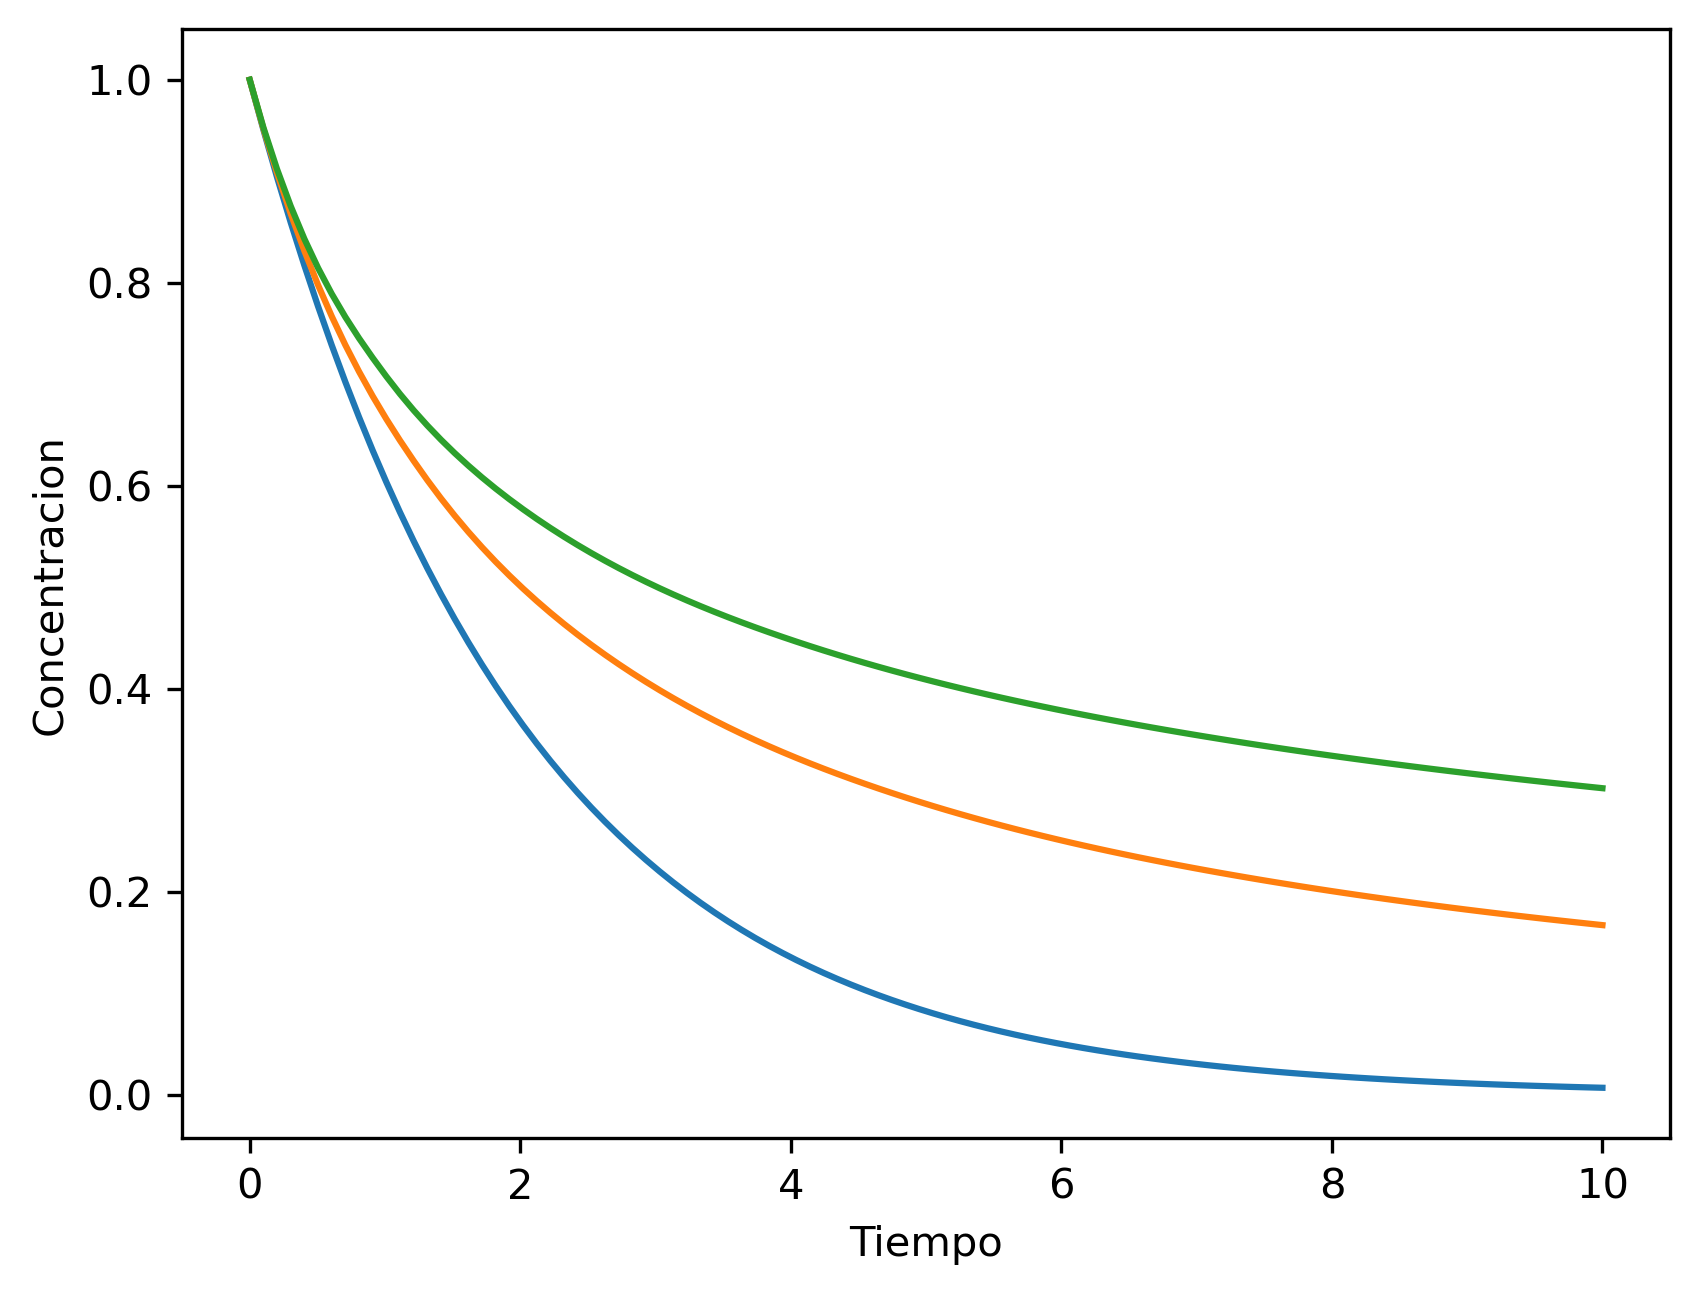

In [13]:
tiempo = sol1.t
c1 = sol1.y[0,:]
c2 = sol2.y[0,:]
c3 = sol3.y[0,:]
plt.figure(dpi = 300)

plt.plot(tiempo, c1)
plt.plot(tiempo, c2)
plt.plot(tiempo, c3)
plt.xlabel('Tiempo')
plt.ylabel('Concentracion')

# Ejercicio 2

Para reacciones en serie:
$$
A\overset{k_1}{\rightarrow}B \overset{k_2}{\rightarrow}C
$$
Para simular la cinética de la reacción usted posee el siguiente sistema de EDOs.  

$$
\frac{dC_A}{dt} = - k_1 C_A\\
\frac{dC_B}{dt} = k_1 C_A - k_2 C_B\\
\frac{dC_C}{dt} = k_2 C_B
$$

Donde $C_i$ corresponde a la concentración del compuesto $i$, $k_1 = 0.5$, $k_2 = 0.3$, $C_{A,0} = 1$, $C_{B,0} = 0.5$ y $C_{C,0} = 0$.
Simule la cinética de dicho sistema entre el tiempo $t0 = 0$ y $t1 = 10$.

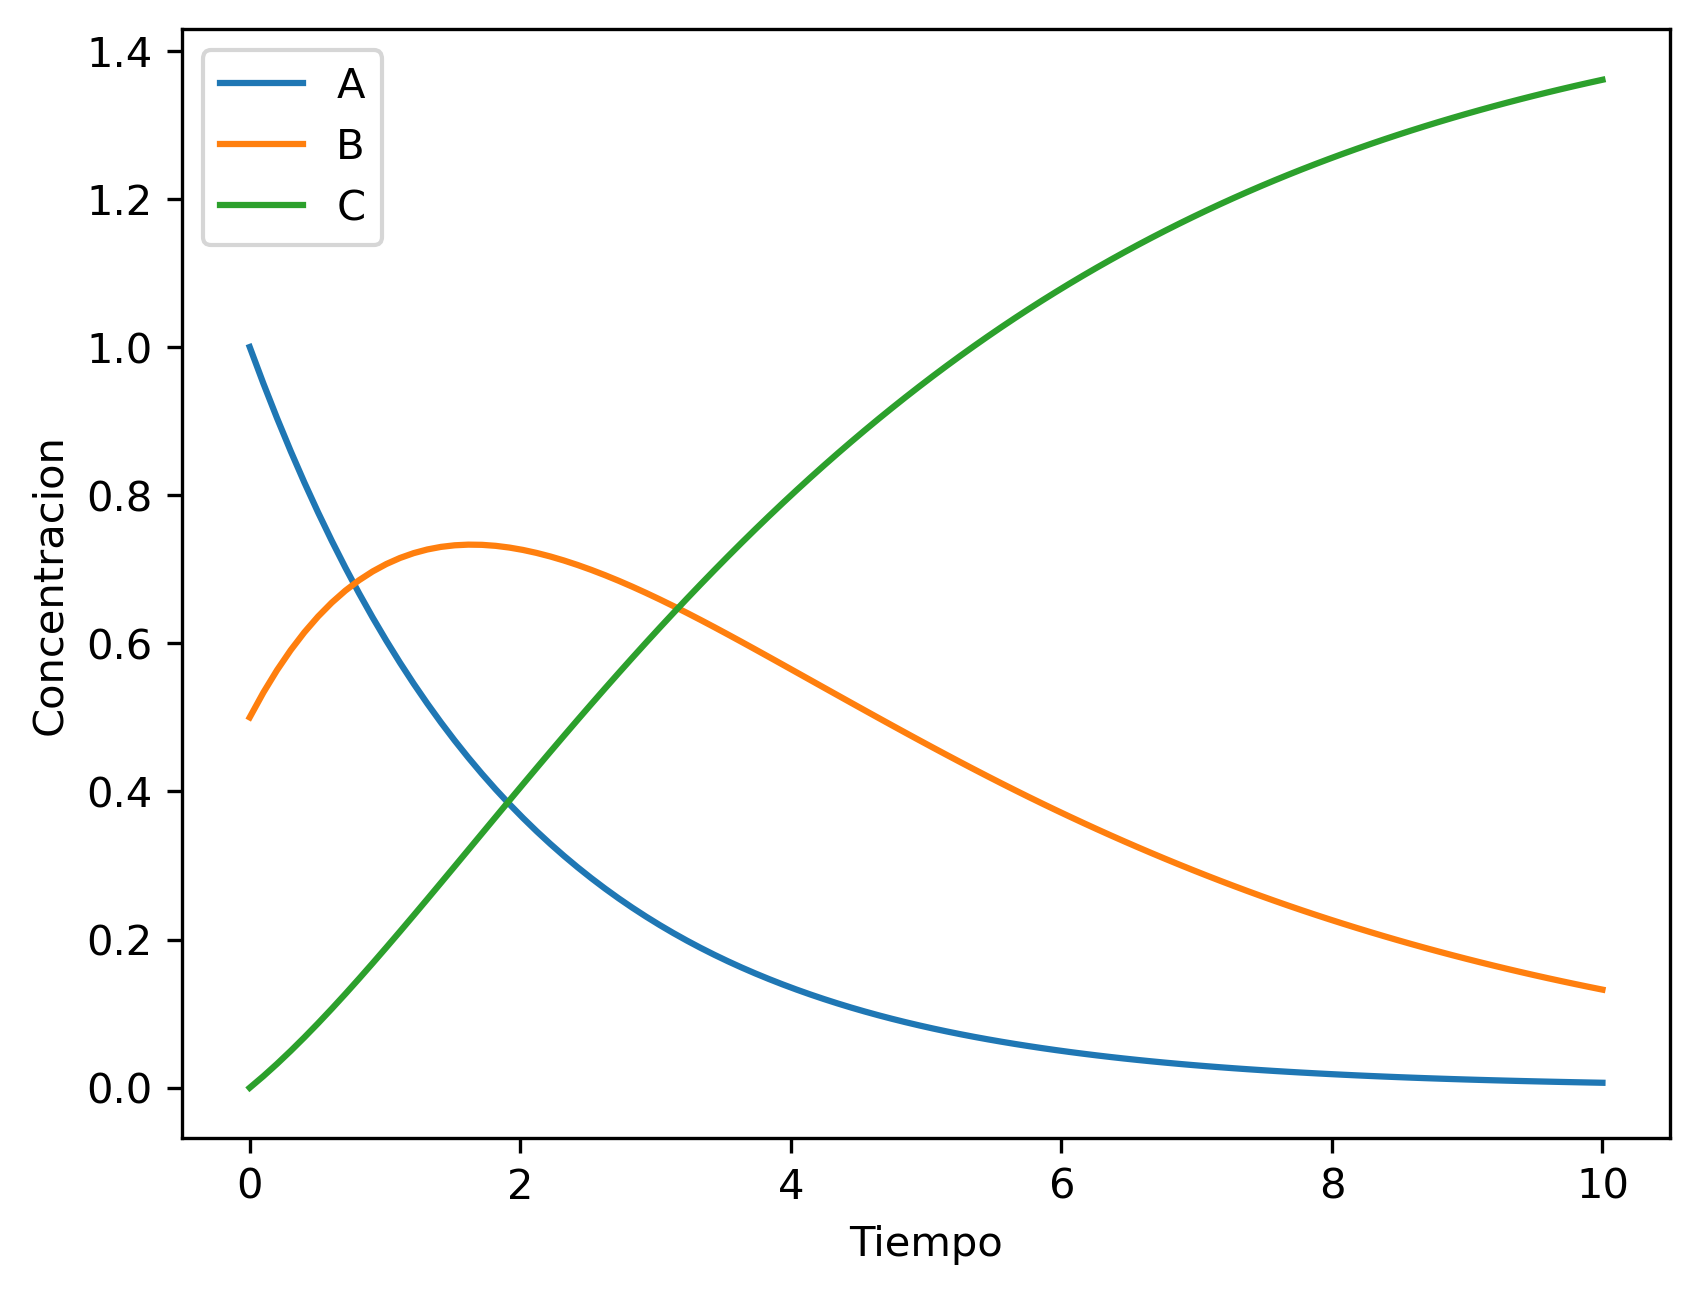

In [14]:
def sys_edo(t, y, k1, k2):
  a, b, c = y
  dca_dt = -k1 * a
  dcb_dt = k1 * a - k2 * b
  dcc_dt = k2 * b
  return dca_dt, dcb_dt, dcc_dt

t_span = [0, 10]
x0 = [1, 0.5, 0]
args = (0.5, 0.3)
t_eval = np.linspace(t_span[0], t_span[1], 100)

sol = solve_ivp(sys_edo,
                t_span = t_span,
                y0 = x0,
                t_eval = t_eval,
                args = args)


tiempo = sol1.t
ca = sol.y[0,:]
cb = sol.y[1,:]
cc = sol.y[2,:]
plt.figure(dpi = 300)

plt.plot(tiempo, ca, label = 'A')
plt.plot(tiempo, cb, label = 'B')
plt.plot(tiempo, cc, label = 'C')
plt.xlabel('Tiempo')
plt.ylabel('Concentracion')
plt.legend()